In [64]:
import pandas as pd 
import numpy as np

In [65]:
df = pd.read_csv('mall.csv')
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [66]:
df = df.drop(columns=['CustomerID','Genre'])

In [67]:
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


In [68]:
x= df.iloc[: ,[0,1]].values

In [69]:
from sklearn.cluster import KMeans  

In [70]:
import matplotlib.pyplot as plt

In [71]:
a = []
for i in range(1,11):
    b= KMeans(n_clusters=i ,init = 'k-means++',random_state=42)
    b.fit(x)
    a.append(b.inertia_)


c:\Users\yasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

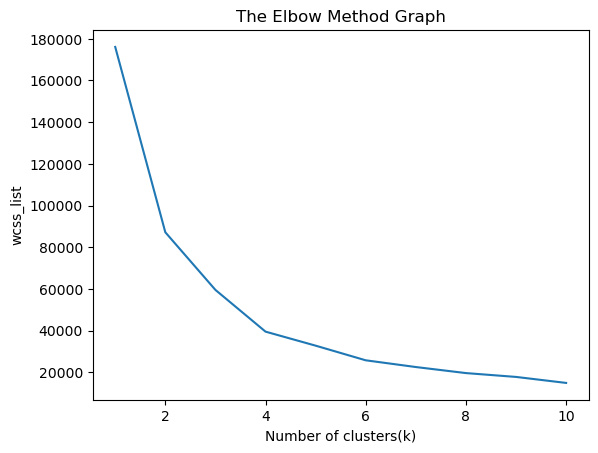

In [72]:
plt.plot(range(1,11),a)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [73]:
b = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= b.fit_predict(x)  

c:\Users\yasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


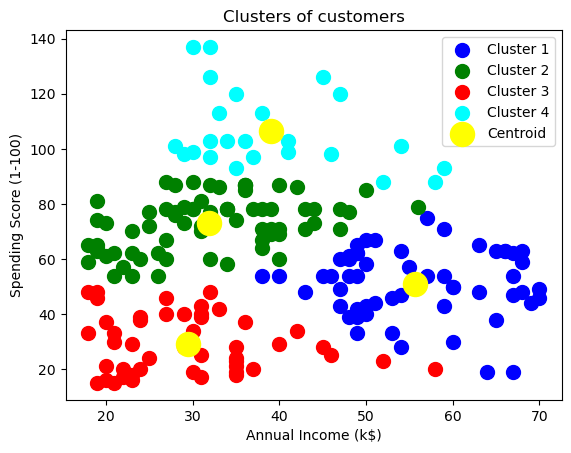

In [74]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
 
plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow', 
            label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [75]:
import numpy as np
import pandas as pd

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [77]:
df =  pd.read_csv('Social_network_Ads.csv')

In [78]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [79]:
df = df.drop(columns= ['User ID','Gender'])


In [80]:
x= df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

In [81]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('PCA',PCA(n_components=2)),
    ('classifier',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [83]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [84]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [85]:
y_pred=pipe.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred)

0.8875